In [1]:
import pandas as pd
import seaborn as sns
import scanpy as sc

In [2]:
split = 3
path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood_{split}.h5ad"
adata_ood = sc.read(path)
ood_conditions = adata_ood.obs["condition"].cat.categories

In [3]:
df = pd.read_csv("gse_score_3.csv")
df = df.T
df["score"] = df[0]
df["condition"] = df.index

In [4]:
def get_mode(x):
    if "pred" in x["condition"]:
        return "ood_pred"
    if x["condition"] in ood_conditions:
        return "ood_true"
    return "seen"

In [5]:
df["mode"] = df.apply(get_mode, axis=1)

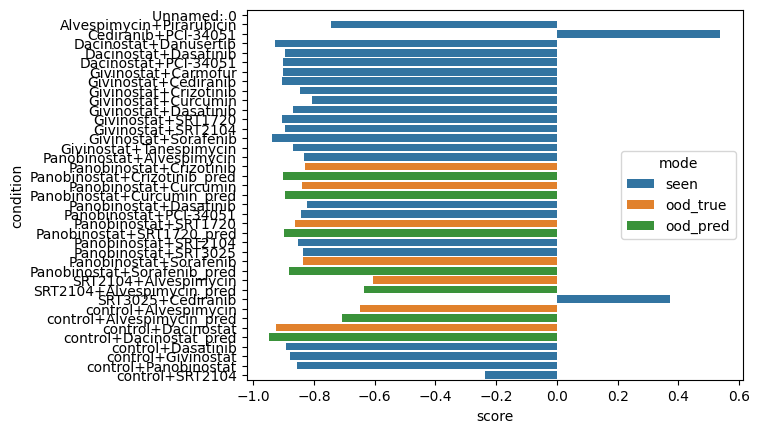

In [6]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.show()


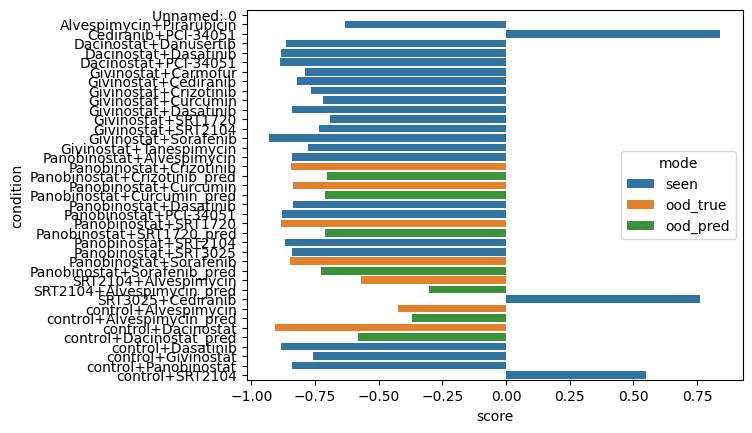

In [25]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.show()
